# Medical Data Visualizer

## Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.    
File name: medical_examination.csv

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print('pd:', pd.__version__)
print('sns:', sns.__version__)
print('np:', np.__version__)

pd: 1.5.3
sns: 0.12.2
np: 1.23.5


### 000- Import Data

In [40]:
### 111- Import data
df = pd.read_csv('medical_examination.csv')
print(df.shape)
display(df.head())
df.sample(10)

(70000, 13)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69964,99951,22491,2,170,72.0,120,80,1,1,0,0,0,1
49068,70039,18694,1,167,63.0,120,90,3,2,0,0,1,1
66569,95039,19512,2,179,80.0,120,80,1,1,0,0,1,0
18091,25837,16659,2,176,62.0,120,80,1,1,0,0,1,0
41823,59735,21313,2,165,102.0,130,90,3,2,0,1,0,1
34197,48864,21770,2,163,61.0,140,90,3,1,0,0,1,1
48798,69675,20671,2,173,90.0,130,70,1,1,0,0,1,0
14440,20634,22630,1,155,56.0,160,100,3,3,0,0,1,1
46132,65901,14729,2,168,76.0,140,90,1,1,1,1,1,1
63468,90619,19632,2,170,79.0,160,100,1,1,0,0,1,1


### References:
- age: objetive feature - int (days)
- sex: of - categorical code ?
- height: of - int (cm)
- weight: of - float (kg)
- ap_hi: examination feature - int - Systolic blood pressure
- ap_lo: ef - int - Diastolic blood pressure
- cholesterol: ef - 1: normal, 2: above normal, 3: well above normal
- gluc: ef - 1: , 2:, 3: idem cholesterol - Glucose
- smoke: subjective feature - binary
- alco: sf - binary - Alcohol intake - binary
- active: df - binary - Physical activity
- cardio: target variable - binary - Presence or absence of cardiovascular disease

### 111- Next Task: add overweight column
Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [41]:
# height_m (in m). = height / 100 = h * 0.01
newS1 = df.height * 0.01
newS1

# Sqr height_m = (height * 0.01) ** 2
newS2 = (df.height * 0.01) ** 2
newS2

# BMI = weight / (height * 0.01) ** 2
bmiS3 = df.weight / ((df.height * 0.01) ** 2)
bmiS3

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [42]:
#df['bmi'] = df.weight / ((df.height * 0.01) ** 2)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [43]:
# conditional column creation:
    # 1. df[]= [1 if x > 25 else 0 for x in (df.weight / ((df.height * 0.01) ** 2))]    # Faster and most used
    # 2. df[] = np.where((df.weight / ((df.height * 0.01) ** 2)) > 25, 1, 0)
    # 3. df[] = df.bmi.map(lambda x: 1 if x > 25 else 0)       # with the auxiliary bmi column - NOT here
    # -- also: df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda v: 0 if v < 25 else 1)
    # __ als1A: df.loc[(df['weight'] / ((df['height'] / 100) ** 2)) > 25, 'overweight'] = 1
    # __ als1B: df.loc[(df['weight'] / ((df['height'] / 100) ** 2)) < 25, 'overweight'] = 0

#df['overweight'] = [0 if x < 25 else 1 for x in df['bmi']]

df['overweight'] = [1 if x > 25 else 0 for x in df.weight / ((df.height * 0.01) ** 2)]
#df['overweight'] = np.where((df.weight / ((df.height * 0.01) ** 2)) > 25, 1, 0)

df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


### 222- Normalize the data by making 0 always good and 1 always bad.
If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [44]:
# valid comment above about conditional 
df['cholesterol'] = df.cholesterol.map(lambda x: 0 if x == 1 else 1)
df['gluc'] = df.gluc.map(lambda x: 0 if x == 1 else 1)
df

## __ als:
# df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
# df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
# df.loc[df['gluc'] == 1, 'gluc'] = 0
# df.loc[df['gluc'] > 1, 'gluc'] = 1

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


### 333- Draw Categorical Plot
def draw_cat_plot():    
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.    
    df_cat = None

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None    
    
    # Draw the catplot with 'sns.catplot()'    

    # Get the figure for the output    
    fig = None

    # Do not modify the next two lines    
    fig.savefig('catplot.png')    
    return fig


- https://seaborn.pydata.org/tutorial/data_structure.html    Long-form vs. Wide-form
- https://stackoverflow.com/questions/60625159/using-pandas-dataframe-melt-to-plot-data-with-seaborn
- https://stackoverflow.com/questions/51519101/
- https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- https://pbpython.com/seaborn09.html
- https://datavizpyr.com/stripplot-using-seaborn-catplot/
- https://github.com/mwaskom/seaborn/issues/1702


In [45]:
   # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc',
    # 'smoke', 'alco', 'active', and 'overweight'.

df_cat = df.melt(id_vars='cardio',
                value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [46]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
# You will have to rename one of the columns for the catplot to work correctly.
df_cat['total'] = 1
#df_cat = df_cat.groupby(['cardio','variable', 'value']).count()
df_cat = df_cat.groupby(['cardio','variable', 'value'], as_index=False).count()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


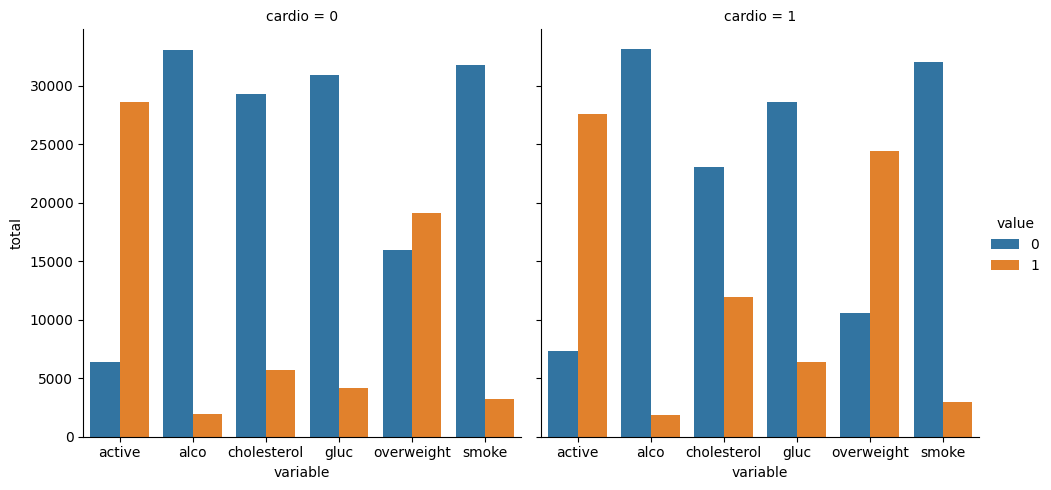

In [47]:
# Draw the catplot with 'sns.catplot()'
g = sns.catplot(data= df_cat, x='variable', y= 'total', col='cardio', hue='value', kind='bar')

In [48]:
print('type(g):', type(g))

# Get the figure for the output
fig = g.figure
print('type(fig):', type(fig))

# Do not modify the next two lines
# fig.savefig('catplot.png')

type(g): <class 'seaborn.axisgrid.FacetGrid'>
type(fig): <class 'matplotlib.figure.Figure'>


### 444- Clean the data. Filter out the following patient segments that represent incorrect data:
1. diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    - diastolic blood pressure: 'ap_lo'; systolic blood pressure: 'ap_hi; 'ap_lo' must be <= 'ap_hi' 
2.  height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
3.  height is more than the 97.5th percentile
4.  weight is less than the 2.5th percentile
5.  weight is more than the 97.5th percentile


In [49]:
# 1. diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
wrong_pressures = (df.loc[df['ap_lo'] > df['ap_hi']])          # all WRONG DATA... 
display(wrong_pressures)
wrong_pressures.shape[0], len(wrong_pressures), len(wrong_pressures.index)
# len(wrong_pressures.index) --> FASTER

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
228,314,17489,2,183,98.0,160,1100,0,1,1,0,1,1,1
241,334,21932,2,157,60.0,160,1000,1,0,0,0,0,1,0
260,357,18217,1,150,83.0,140,800,0,0,0,0,1,1,1
329,458,23407,1,176,63.0,160,1000,1,1,0,0,0,1,0
345,482,18704,1,154,81.0,140,1000,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,0,0,0,0,1,1,1
69872,99798,21808,1,152,56.0,160,1000,0,0,0,0,1,1,0
69878,99807,21239,2,168,95.0,160,1000,0,0,0,0,1,1,1
69885,99816,22417,2,166,78.0,170,1000,0,0,0,0,0,0,1


(1234, 1234, 1234)

In [50]:
# future: analize haw to DELETE (.drop) rows from a DF
good_pressures = df.loc[df['ap_lo'] <= df['ap_hi']]           # Good data
display(good_pressures)
print(good_pressures.shape[0], len(good_pressures.index))
len(wrong_pressures.index), len(good_pressures), len(wrong_pressures.index) + len(good_pressures.index)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


68766 68766


(1234, 68766, 70000)

In [51]:
# 1. 
df = df.loc[df['ap_lo'] <= df['ap_hi']]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [52]:
### some test for point 2., 3., 4, 5. to filter
print(df.describe())

                 id           age           sex        height        weight  \
count  68766.000000  68766.000000  68766.000000  68766.000000  68766.000000   
mean   49976.959878  19464.145188      1.348893    164.359916     74.114962   
std    28842.637757   2468.319995      0.476959      8.190703     14.332163   
min        0.000000  10798.000000      1.000000     55.000000     11.000000   
25%    25008.250000  17657.000000      1.000000    159.000000     65.000000   
50%    50020.500000  19701.000000      1.000000    165.000000     72.000000   
75%    74865.750000  21324.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  68766.000000  68766.000000  68766.000000  68766.000000  68766.000000   
mean     128.839601     81.245776      0.250065      0.149652      0.087878   
std      155.201462      9.694132      0.433054    

In [60]:
for percent in [0.025, 0.25, 0.50, 0.75, 0.975]:
    print(df.height.quantile(percent), end='  ')
print()
print('min:', df.height.min(), 'mean:', df['height'].mean(), 'max:', df.height.max())

152.0  159.0  165.0  169.0  178.0  
min: 150 mean: 164.40753731456596 max: 180


In [53]:
# 2. height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
df = df.loc[df['height'] >= df['height'].quantile(0.025)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [54]:
# 3.  height is more than the 97.5th percentile
df = df.loc[df['height'] <= df['height'].quantile(0.975)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [61]:
# 4.  weight is less than the 2.5th percentile
df = df.loc[df['weight'] >= df['weight'].quantile(0.025)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [62]:
# 5.  height is more than the 97.5th percentile
df = df.loc[df['weight'] <= df['weight'].quantile(0.975)]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


### 555- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap().
Mask the upper triangle. The chart should look like examples/Figure_2.png.